# IF240 - Machine Learning and deep learning

## Practice 1: K-Means algorithm

By AurÃ©lie Bugeau and MichaÃ«l ClÃ©ment

Credits: Chris Piech and Andrew Ng

In [22]:
import numpy as np

K-Means is an algorithm that takes aims at clustering a given dataset into $k$ groups (called clusters) of data similar to each other. Each cluster is characterized by its centroid. 
In this practice, you are going to implement the K-Means algorithm and apply it on different datasets.

1. Read and understand the `kmeans` function below
2. Complete the following functions
3. Experiment and validate on a toy dataset

In [23]:
def kmeans(dataset, num_clusters, max_iterations=5):
    centroids = get_random_centroids(dataset, num_clusters)
    old_centroids = None
    iterations = 0
    while not should_stop(old_centroids, centroids, iterations, max_iterations):
        old_centroids = centroids
        iterations += 1
        labels = get_labels(dataset, centroids)
        centroids = get_centroids(dataset, labels, num_clusters)
    return centroids, labels

In [24]:
# Initialize centroids by choosing randomly k points from the dataset
def get_random_centroids(dataset, num_clusters):
    num_points = dataset.shape[0] #Puisque c'est des vecteurs donc le nombre de points(vecteurs) est tout simplement le nombre de lignes
    random_indices = np.random.randint(num_points, size=num_clusters) #on génère num_clusters indices aléatoires entre 0 et num_points-1
    random_centroids = dataset[random_indices, :] #on extrait les vecteurs dont les indices ont étaient choisit
    return random_centroids

In [25]:
# Returns True or False if k-means if the maximum number of iterations is reached 
# or if the centroids do not change anymore (i.e. if the distance with the previous ones is very small)
def should_stop(old_centroids, centroids, iterations, max_iterations):
    if (old_centroids is None):
        return False
    return (iterations == max_iterations) or ((np.linalg.norm(old_centroids-centroids)) < 10e-4)

In [26]:
# Returns the label for each point in the dataSet. The label is the index of the closest centroid
def get_labels(dataset, centroids):

    num_points = dataset.shape[0]
    labels = np.zeros(dataset.shape[0])
    for i in range(num_points):
        distances = np.array([np.linalg.norm(dataset[i]-centroids[j]) for j in range(centroids.shape[0])])
        min = np.min(distances)
        temp, = np.where(distances == min)
        labels[i] = temp[0]
    return labels

In [27]:
# Returns the centroids of the clusters. Each centroid is the geometric mean of the points that
# have that centroid's label. Important: If a centroid is empty (no points have this centroid's label) you should randomly re-initialize it.
def get_centroids(dataset, labels, k):
    num_points = dataset.shape[0]
    centroids = np.zeros((k,dataset.shape[1]))
    for i in range(k):
        s, = np.where(labels == i)
        if s.size == 0:
            centroids[i] = dataset[np.random.randint(num_points, size=1), :]
        else:
            mean = np.mean(dataset[s], axis = 0)
            centroids[i] = mean
    return centroids

### Toy dataset

Experiment your algorithm on different sets of points with different values of $k$. <span style="color:red">Analyze you results</span>.

In [28]:
x1 = np.array([1, 1])
x2 = np.array([2, 2])
x3 = np.array([3, 3])
x4 = np.array([4, 4])
testX = np.vstack((x1, x2, x3, x4))
centroids ,labels = kmeans(testX, 3)
print(centroids)
print(labels)

[[2.5 2.5]
 [1.  1. ]
 [4.  4. ]]
[1. 0. 0. 2.]


### 2D Point Cloud
You are now going to test and plot the result on a 2D point cloud

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

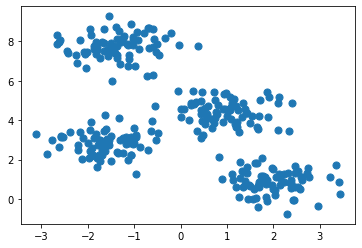

In [30]:
# Dataset generation
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

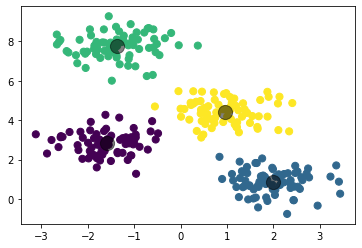

In [31]:
# Apply K-Means
centers, labels = kmeans(X,4)
# plot the labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# plot the centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#### Scikit-learn library
The Scikit-learn library proposes many functions for machine learning. You are going to compare the results obtained by your implementation with the ones from this library. 

* Study the documentation of the KMeans function and apply it to the 2D dataset.
* Compare

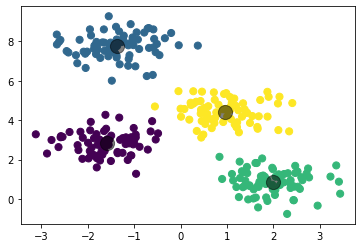

In [32]:
from sklearn.cluster import KMeans
#Applying sklearn.cluster.KMeans to the 2D dataset
#Calling sklearn.cluster.KMeans
kmean_result = KMeans(4).fit(X)
#Plotting the points
plt.scatter(X[:, 0], X[:, 1], c=kmean_result.labels_, s=50, cmap='viridis')
#Plotting clusters centers
plt.scatter(kmean_result.cluster_centers_[:, 0], kmean_result.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)
#We observe that in term of centers positions we have the same results and visually we can say we have tha same clusters
#but to determine really the quality of the two functions we should compare their inertia value.

### 2 moons problem
Observe and explain the clustering in 2 classes obtained on the following dataset

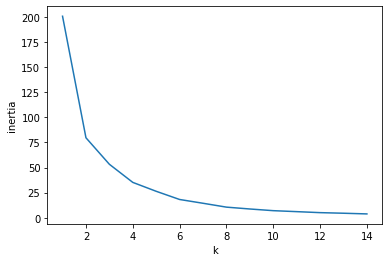

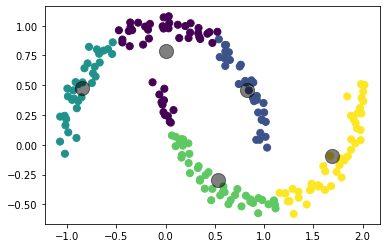

In [51]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

# COMPLETE
#In the example above we had the value of k but in this example we don't have this value this way we'll try 
#to determine the best value using "elbow technique" so we'll plot inertia in terms of k
plt.plot([i for i in range(1,15)], [KMeans(i).fit(X).inertia_ for i in range(1,15)])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()
#We observe that 6 or 5 are good values with a low value of inertia 
result = KMeans(5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=result.labels_, s=50, cmap='viridis')
plt.scatter(result.cluster_centers_[:, 0], result.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)

### 3D Point Cloud
Observe and explain the clustering on a 3D point cloud (<span style="color:red">Analyze you results</span>)

/tmp/ipykernel_8770/1326681656.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


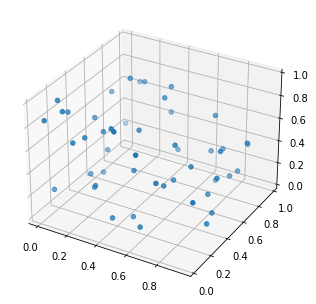

/tmp/ipykernel_8770/1326681656.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


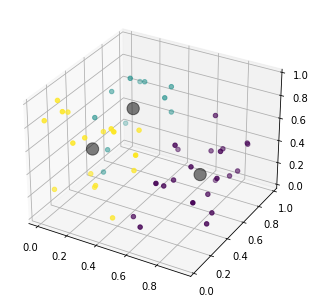

In [51]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X = np.random.rand(50,3)
ax.scatter(X[:, 0], X[:, 1],X[:, 2], s=20)
plt.show()



kmeans = KMeans(n_clusters=3).fit(X)


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1],X[:, 2],c=kmeans.labels_, s=20)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],c='black', s=150 ,alpha=0.5)


plt.show()

# we observe that each point is attached to the cluster which have the nearest centroid such as distances 
# are calculated in 3D point cloud